In [3]:
import pandas as pd

In [4]:
mvps = pd.read_csv("mvps.csv")

# note: did some manual editing via excel to merge the 2022 ranked-choice voting shift

In [5]:
# delete unnecessary columns
del mvps["Unnamed: 0"]
del mvps["Rk"]

In [6]:
# repeated columns already in players csv
del mvps["Games G"]
del mvps["Games GS"]
del mvps["Passing Cmp"]
del mvps["Passing Att"]
del mvps["Passing Yds"]
del mvps["Passing TD"]
del mvps["Passing Int"]
del mvps["Rushing Att"]
del mvps["Rushing Yds"]
del mvps["Rushing TD"]
del mvps["Receiving Rec"]
del mvps["Receiving Yds"]
del mvps["Receiving TD"]

In [7]:
# repeated columns already in defensive players csv
del mvps["Solo"]
del mvps["Sk"]
del mvps["Int"]

In [8]:
players = pd.read_csv("players.csv")

In [9]:
del players["Unnamed: 0"]
del players["Rk"]

# not all players have fantasy position & overall ranks
del players["Fantasy PosRank"]
del players["Fantasy OvRank"]

In [10]:
# some player names have "*" & "+"
# use str.replace to replace "*" w/ nothing
# regex=False --> don't use regular expressions, treat as regular asterik
players["Player"] = players["Player"].str.replace("*", "", regex=False)
players["Player"] = players["Player"].str.replace("+", "", regex=False)

In [11]:
# delete header rows
players = players[~players["Player"].str.contains("Player")]

In [12]:
defensive_players = pd.read_csv("defensive_players.csv")

In [13]:
del defensive_players["Unnamed: 0"]
del defensive_players["Rk"]

In [14]:
defensive_players["Player"] = defensive_players["Player"].str.replace("*", "", regex=False)
defensive_players["Player"] = defensive_players["Player"].str.replace("+", "", regex=False)

In [15]:
# delete header rows
defensive_players = defensive_players[~defensive_players["Player"].str.contains("Player")]

In [16]:
# merge dfs
combined_players = players.merge(defensive_players, how="outer", on=["Player", "Tm", "Pos", "Age", "Games G", "Games GS", "Year"])

In [17]:
# getting rid of fantasy columns
del combined_players["Fantasy FantPt"]
del combined_players["Fantasy PPR"]
del combined_players["Fantasy DKPt"]
del combined_players["Fantasy FDPt"]
del combined_players["Fantasy VBD"]

In [18]:
# replace NaN's w/ 0's
combined_players[["Passing Cmp", "Passing Att", "Passing Yds", "Passing TD", "Passing Int", "Rushing Att", "Rushing Yds", "Rushing Y/A", "Rushing TD", "Receiving Tgt", "Receiving Rec", "Receiving Yds", "Receiving Y/R", "Receiving TD", "Fumbles Fmb", "Fumbles FL", "Scoring TD", "Scoring 2PM", "Scoring 2PP", "Int", "Sk", "Tackles Comb", "Tackles Solo", "Tackles Ast"]] = combined_players[["Passing Cmp", "Passing Att", "Passing Yds", "Passing TD", "Passing Int", "Rushing Att", "Rushing Yds", "Rushing Y/A", "Rushing TD", "Receiving Tgt", "Receiving Rec", "Receiving Yds", "Receiving Y/R", "Receiving TD", "Fumbles Fmb", "Fumbles FL", "Scoring TD", "Scoring 2PM", "Scoring 2PP", "Int", "Sk", "Tackles Comb", "Tackles Solo", "Tackles Ast"]].fillna(0)

In [19]:
combined_players.to_csv("combined_players.csv")

In [20]:
nicknames = {}

with open("nicknames.csv") as f:
    lines = f.readlines()
    # skip row 0 since header row ([1: ] means from row 1 onwards)
    for line in lines[1: ]:
        abbrev, name = line.replace("\n", "").split(",")
        nicknames[abbrev] = name

In [21]:
# converts Tm column into full team names
combined_players["Team"] = combined_players["Tm"].map(nicknames)

In [28]:
# rename mvps "Tm" column to "Team" to match combined_players
mvps = mvps.rename(columns={"Tm" : "Team"})

In [29]:
# merge dfs
combined = combined_players.merge(mvps, how="outer", on=["Player", "Pos", "Team", "Year"])

In [30]:
# replace NaN's w/ 0's
combined[["Votes", "Share"]] = combined[["Votes", "Share"]].fillna(0)

In [31]:
teams = pd.read_csv("teams.csv")

In [32]:
del teams["Unnamed: 0"]

In [33]:
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)
teams["Team"] = teams["Team"].str.replace("+", "", regex=False)

In [34]:
# delete header rows
teams = teams[~teams["Team"].str.contains("AFC East")]
teams = teams[~teams["Team"].str.contains("AFC Central")]
teams = teams[~teams["Team"].str.contains("AFC West")]

teams = teams[~teams["Team"].str.contains("AFC North")]
teams = teams[~teams["Team"].str.contains("AFC South")]

teams = teams[~teams["Team"].str.contains("NFC East")]
teams = teams[~teams["Team"].str.contains("NFC Central")]
teams = teams[~teams["Team"].str.contains("NFC West")]

teams = teams[~teams["Team"].str.contains("NFC North")]
teams = teams[~teams["Team"].str.contains("NFC South")]

In [35]:
# replace washington commanders team name so that all WAS goes to correct team
teams["Team"] = teams["Team"].replace("Washington Redskins", "Washington Commanders")
teams["Team"] = teams["Team"].replace("Washington Football Team", "Washington Commanders")

# replace houston oilers team name so that all HOU goes to correct team
teams["Team"] = teams["Team"].replace("Houston Oilers", "Houston Texans")

# replace tennessee oilers team name so that all TEN goes to correct team
teams["Team"] = teams["Team"].replace("Tennessee Oilers", "Tennessee Titans")

In [37]:
# verify replaced all
print(sum(teams["Team"] == "Washington Redskins"))
print(sum(teams["Team"] == "Washington Football Team"))
print(sum(teams["Team"] == "Houston Oilers"))
print(sum(teams["Team"] == "Tennessee Oilers"))

0
0
0
0


In [38]:
# for every row in combined, we add row from teams that corresponds to win/loss record
stats = combined.merge(teams, how="outer", on=["Team", "Year"])

# if number of rows stays the same, usually indicates merge went well
# stats & combined have same number of rows

In [39]:
stats

,Player,Tm,Pos,Age,Games G,Games GS,Passing Cmp,Passing Att,Passing Yds,Passing TD,...,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,Andre Rison,2TM,WR,29,15,13,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bucky Brooks,2TM,DB,25,8,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Calvin Williams,2TM,WR,29,8,2,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Corey Dowden,2TM,DB,28,12,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D.J. Johnson,2TM,DB,30,9,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44744,Tariq Castro-Fields,WAS,CB,24,8,1,0,0,0,0,...,NaN,0.235,329,518,-189,-11.1,0.0,-11.1,-2.8,-8.4
44745,Terrell Burgess,WAS,S,25,12,1,0,0,0,0,...,NaN,0.235,329,518,-189,-11.1,0.0,-11.1,-2.8,-8.4
44746,Terry McLaurin,WAS,WR,28,17,17,0,0,0,0,...,NaN,0.235,329,518,-189,-11.1,0.0,-11.1,-2.8,-8.4
44747,Tress Way,WAS,P,33,17,0,0,0,0,0,...,NaN,0.235,329,518,-189,-11.1,0.0,-11.1,-2.8,-8.4


In [40]:
combined

,Player,Tm,Pos,Age,Games G,Games GS,Passing Cmp,Passing Att,Passing Yds,Passing TD,...,Scoring 2PP,Year,Int,Sk,Tackles Comb,Tackles Solo,Tackles Ast,Team,Votes,Share
0,'Omar Ellison,SDG,WR,25,10,1,0,0,0,0,...,0,1996,0,0,0,0,0,San Diego Chargers,0.0,0
1,A'Shawn Robinson,NYG,DL,28,17,13,0,0,0,0,...,0,2023,0,0.0,62,34,28,New York Giants,0.0,0
2,A'Shawn Robinson,LAR,DT,25,8,0,0,0,0,0,...,0,2020,0,0.0,12,6,6,Los Angeles Rams,0.0,0
3,A'Shawn Robinson,LAR,LDE,26,17,14,0,0,0,0,...,0,2021,0,2.0,67,33,34,Los Angeles Rams,0.0,0
4,A'Shawn Robinson,LAR,LDE,27,10,10,0,0,0,0,...,0,2022,0,0.0,42,22,20,Los Angeles Rams,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44744,Zurlon Tipton,IND,RB,24,6,0,0,0,0,0,...,0,2014,0,0.0,2,2,0,Indianapolis Colts,0.0,0
44745,Zurlon Tipton,IND,RB,25,10,0,0,0,0,0,...,0,2015,0,0.0,3,1,2,Indianapolis Colts,0.0,0
44746,Zyon Gilbert,NYG,CB,23,3,1,0,0,0,0,...,0,2022,0,1.0,14,10,4,New York Giants,0.0,0
44747,Zyon McCollum,TAM,CB,23,13,3,0,0,0,0,...,0,2022,0,0.0,24,18,6,Tampa Bay Buccaneers,0.0,0


In [41]:
# replace NaN's w/ 0's
stats[["W", "L", "T", "W-L%", "PF", "PA", "PD", "MoV", "SoS", "SRS", "OSRS", "DSRS"]] = stats[["W", "L", "T", "W-L%", "PF", "PA", "PD", "MoV", "SoS", "SRS", "OSRS", "DSRS"]].fillna(0)

In [43]:
# get rid of "%" in share column
stats["Share"] = stats["Share"].str.replace("%", "", regex=False)

In [ ]:
# convert all numeric values to numeric types
stats = stats.apply(pd.to_numeric, errors="ignore")

In [45]:
# convert share column to decimal
stats["Share"] = stats["Share"]/100

In [46]:
stats.dtypes

Player            object
Tm                object
Pos               object
Age              float64
Games G          float64
Games GS         float64
Passing Cmp      float64
Passing Att      float64
Passing Yds      float64
Passing TD       float64
Passing Int      float64
Rushing Att      float64
Rushing Yds      float64
Rushing Y/A      float64
Rushing TD       float64
Receiving Tgt    float64
Receiving Rec    float64
Receiving Yds    float64
Receiving Y/R    float64
Receiving TD     float64
Fumbles Fmb      float64
Fumbles FL       float64
Scoring TD       float64
Scoring 2PM      float64
Scoring 2PP      float64
Year               int64
Int              float64
Sk               float64
Tackles Comb     float64
Tackles Solo     float64
Tackles Ast      float64
Team              object
Votes            float64
Share            float64
W                  int64
L                  int64
T                  int64
W-L%             float64
PF                 int64
PA                 int64


In [48]:
stats.to_csv("player_mvp_stats.csv")

In [49]:
highest_scoring = stats[stats["Int"] > 5].sort_values("Int", ascending=False).head(10)

<Axes: xlabel='Player'>

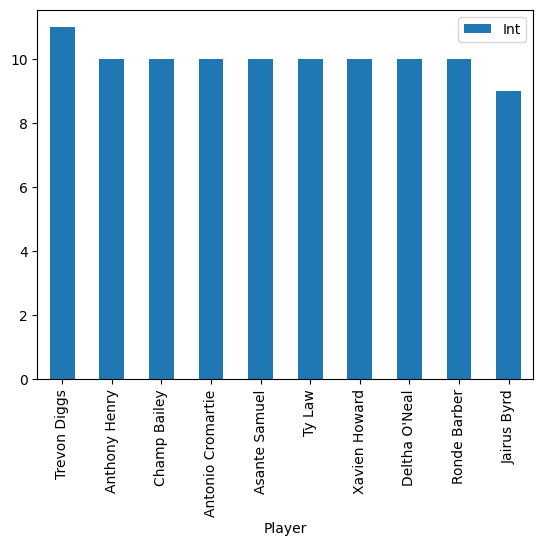

In [50]:
highest_scoring.plot.bar("Player", "Int")

In [52]:
stats.corr(numeric_only=True)["Share"]

Age              0.133240
Games G          0.125045
Games GS         0.170406
Passing Cmp      0.272974
Passing Att      0.255928
Passing Yds      0.294976
Passing TD       0.424985
Passing Int      0.132844
Rushing Att     -0.080432
Rushing Yds     -0.052688
Rushing Y/A      0.060525
Rushing TD      -0.013763
Receiving Tgt   -0.128829
Receiving Rec   -0.129662
Receiving Yds   -0.133647
Receiving Y/R   -0.184204
Receiving TD    -0.079003
Fumbles Fmb      0.020866
Fumbles FL      -0.072754
Scoring TD      -0.039791
Scoring 2PM     -0.024413
Scoring 2PP     -0.046429
Year             0.203879
Int             -0.147896
Sk              -0.105539
Tackles Comb    -0.191690
Tackles Solo    -0.191446
Tackles Ast     -0.187964
Votes            0.984601
Share            1.000000
W                0.371470
L               -0.350050
T               -0.077345
W-L%             0.355390
PF               0.503306
PA               0.148228
PD               0.390891
MoV              0.384544
SoS         